In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [6]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [7]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  8


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0


In [9]:
catagorial_features = df.select_dtypes(include = 'object').columns.to_list()

print('Number of catagorial variables: ', len(catagorial_features))

# visualise the catagorial variables
df[catagorial_features].head()

Number of catagorial variables:  9


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II


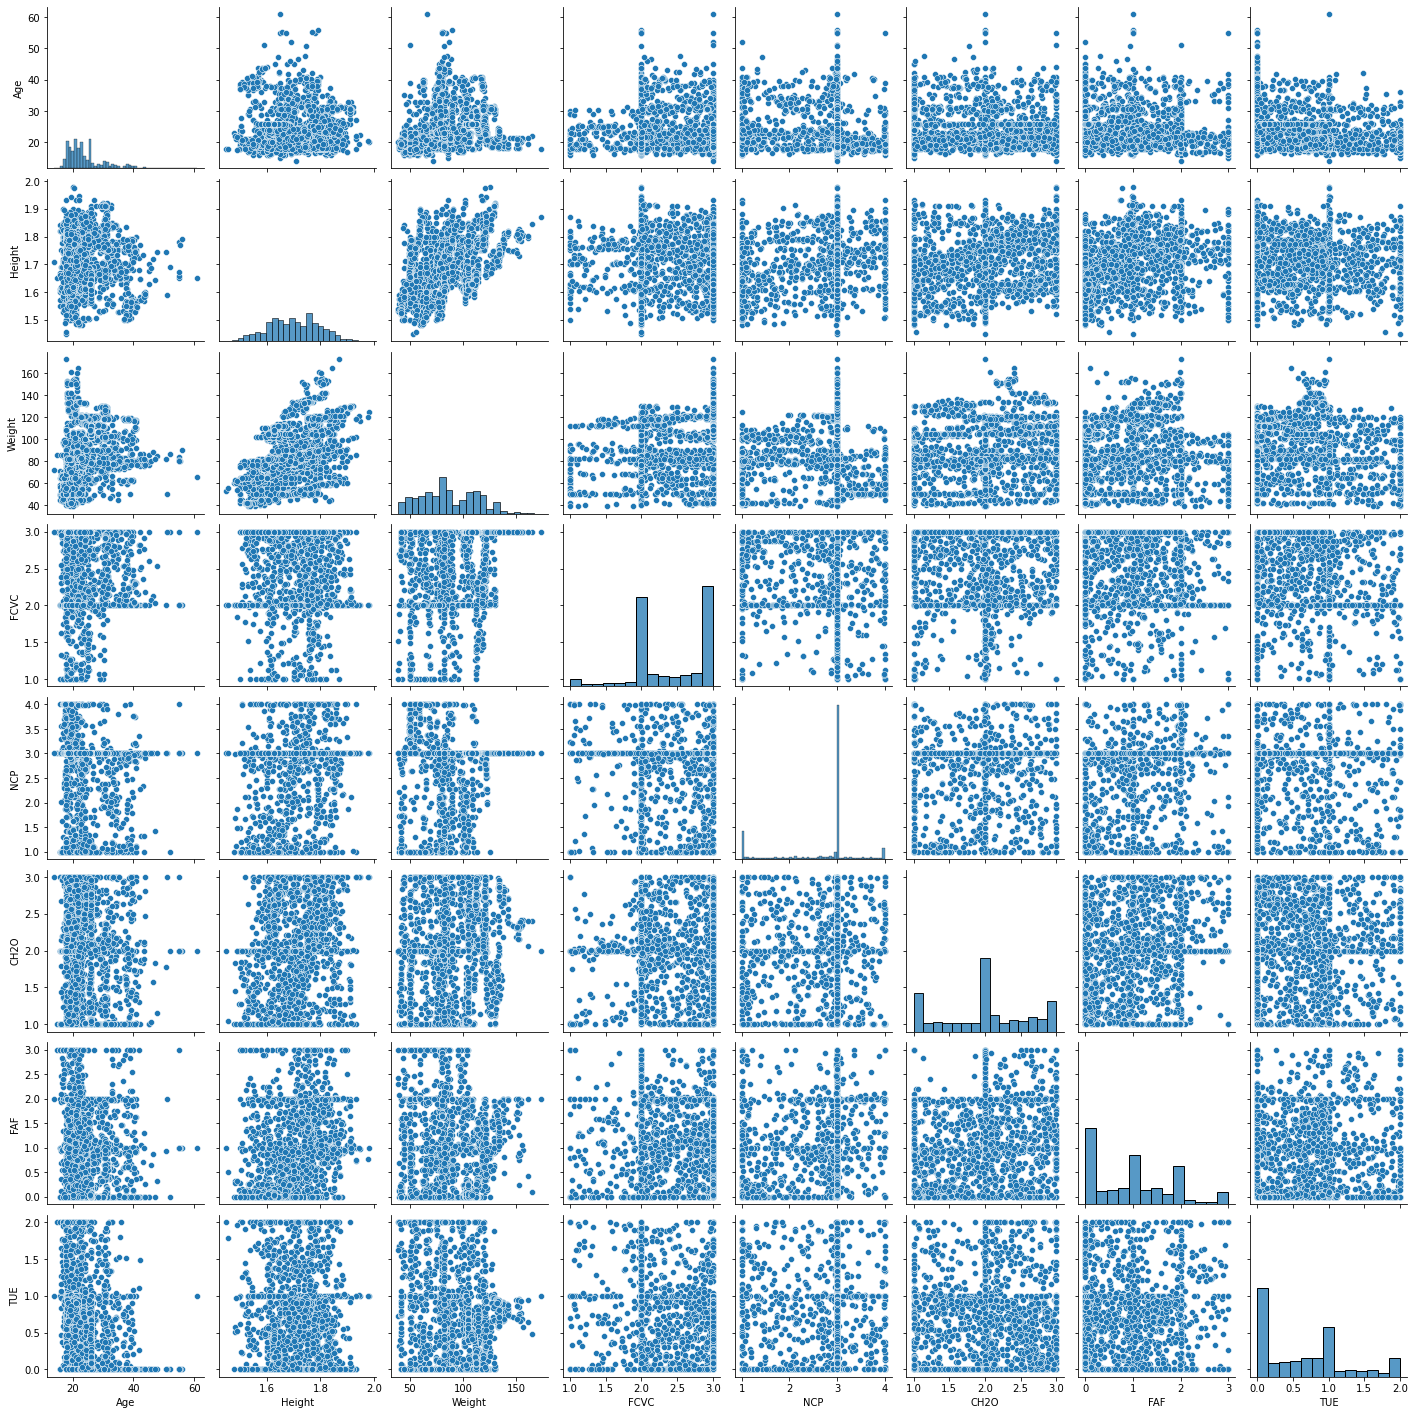

In [10]:
sns.pairplot(df)

In [11]:
x=['family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','FCVC','NCP','CH2O','FAF','TUE']

In [12]:
df=df.drop(x ,axis=1)

In [13]:
df['BMI']=df['Weight']/df['Height']**2

In [14]:
df.head()

,Gender,Age,Height,Weight,NObeyesdad,BMI
0,Female,21.0,1.62,64.0,Normal_Weight,24.386526
1,Female,21.0,1.52,56.0,Normal_Weight,24.238227
2,Male,23.0,1.80,77.0,Normal_Weight,23.765432
3,Male,27.0,1.80,87.0,Overweight_Level_I,26.851852
4,Male,22.0,1.78,89.8,Overweight_Level_II,28.342381


In [15]:
c=df.pop('BMI')

In [16]:
df.insert(4, 'BMI', c)

In [17]:
df.head()

,Gender,Age,Height,Weight,BMI,NObeyesdad
0,Female,21.0,1.62,64.0,24.386526,Normal_Weight
1,Female,21.0,1.52,56.0,24.238227,Normal_Weight
2,Male,23.0,1.80,77.0,23.765432,Normal_Weight
3,Male,27.0,1.80,87.0,26.851852,Overweight_Level_I
4,Male,22.0,1.78,89.8,28.342381,Overweight_Level_II


In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [21]:
print(y)

[1 1 1 ... 4 4 4]


In [22]:
X

array([[0, 21.0, 1.62, 64.0, 24.38652644413961],
       [0, 21.0, 1.52, 56.0, 24.238227146814403],
       [1, 23.0, 1.8, 77.0, 23.76543209876543],
       ...,
       [0, 22.524036, 1.752206, 133.689352, 43.54381658414929],
       [0, 24.361936, 1.73945, 133.346641, 44.07153540333021],
       [0, 23.664709, 1.738836, 133.472641, 44.14433793816422]],
      dtype=object)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [24]:
print(X_train)

[[0 23.0 1.63 55.0 20.70081674131507]
 [1 38.0 1.7 78.0 26.989619377162633]
 [0 18.177882 1.821566 142.102468 42.82642255990604]
 ...
 [0 39.170029 1.688354 79.278896 27.811894389898765]
 [0 19.0 1.69 70.0 24.508945765204302]
 [1 23.384374 1.725587 82.480214 27.699763337046242]]


In [25]:
print(X_test)

[[1 16.30687 1.752755 50.0 16.27524649994985]
 [1 17.0 1.74 56.0 18.49649887699828]
 [1 22.0 1.6 66.0 25.781249999999996]
 ...
 [0 21.0 1.72 80.0 27.041644131963228]
 [0 22.0 1.675446 51.154201 18.223023517295385]
 [1 28.986237 1.758618 113.501549 36.69938281009856]]


In [26]:
print(y_train)

[1 6 4 ... 6 1 6]


In [27]:
print(y_test)

[0 1 5 4 3 4 2 4 2 2 1 3 2 2 5 2 5 3 0 6 2 2 6 2 2 2 2 5 6 3 2 4 6 5 0 2 0
 0 6 6 1 2 5 1 0 4 0 0 5 2 4 2 0 5 4 2 0 2 0 1 0 3 4 6 1 5 4 2 6 3 2 0 4 4
 3 3 0 6 3 4 5 5 4 2 0 6 1 4 1 4 6 6 4 5 0 3 0 5 4 4 0 2 5 1 4 6 1 3 2 6 2
 1 0 0 6 6 4 6 0 0 2 2 2 2 4 4 5 3 4 5 1 5 2 2 6 2 1 4 6 3 3 0 6 6 0 6 6 5
 4 4 2 2 0 6 5 2 4 0 6 3 2 4 1 3 4 1 5 0 6 0 5 4 5 5 4 3 6 3 2 2 5 5 6 1 6
 3 3 2 4 3 1 2 3 1 2 2 4 2 0 2 6 2 5 5 1 2 0 0 2 3 6 5 5 3 4 1 2 0 1 5 1 5
 2 5 3 6 4 4 5 0 3 5 4 6 5 1 1 2 4 3 2 0 6 6 3 0 4 0 5 0 2 5 6 5 2 5 6 3 3
 0 3 5 2 4 2 4 5 4 4 4 0 0 2 3 1 0 0 1 1 2 3 5 6 2 2 1 6 5 6 1 0 3 2 3 3 2
 6 0 0 0 2 6 6 5 3 5 1 0 6 4 4 5 5 2 4 5 3 5 5 3 1 0 6 6 3 3 2 1 1 3 5 0 5
 1 3 5 4 0 5 1 1 4 3 6 6 4 5 4 6 3 5 1 2 6 0 4 2 6 2 4 6 0 5 2 6 5 5 0 4 4
 5 6 5 3 0 0 4 4 1 0 3 6 4 0 1 2 3 4 2 3 2 0 6 2 2 3 3 2 2 2 4 6 1 0 4 0 4
 6 1 3 1 1 2 1 4 2 3 2 6 1 6 0 3]


In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,:] = sc.fit_transform(X_train[:,:])
X_test[:,:] = sc.transform(X_test[:,:])

In [29]:
X_train

array([[-1.0227710428344254, -0.19880977027368263, -0.7639251476291883,
        -1.20412792507246, -1.1216428145812267],
       [0.9777359331847054, 2.2117116158337975, -0.017992302976327382,
        -0.3281087670331453, -0.33870276961908247],
       [-1.0227710428344254, -0.9737310079626046, 1.2774372997818104,
        2.113412539297381, 1.6329392286963351],
       ...,
       [-1.0227710428344254, 2.399736944291527, -0.14209421595957372,
        -0.2793984454183692, -0.23633160729747965],
       [-1.0227710428344254, -0.8416154732356773, -0.12455413792673607,
        -0.632811082872907, -0.6475403690393576],
       [0.9777359331847054, -0.137040320456104, 0.2546674641112834,
        -0.15746731937592995, -0.25029164017584876]], dtype=object)

In [30]:
X_test

array([[0.9777359331847054, -1.2744053039401866, 0.5441746573045544,
        -1.394566872472311, -1.6726151322695888],
       [0.9777359331847054, -1.1630183247166745, 0.4082550368253074,
        -1.1660401355924899, -1.3960748213930363],
       [0.9777359331847054, -0.3595111960141813, -1.0836106524804119,
        -0.7851622407927877, -0.4891417051795218],
       ...,
       [-1.0227710428344254, -0.52021262175468, 0.19513136692449,
        -0.2519331880732049, -0.33222581904179144],
       [-1.0227710428344254, -0.3595111960141813, -0.2796442325135603,
        -1.3506059077667398, -1.4301218129779403],
       [0.9777359331847054, 0.7631870504468428, 0.6066518611359784,
        1.0240667574917013, 0.8701382544926675]], dtype=object)

In [31]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [32]:
print(classifier.predict(sc.transform([[1,21.0,1.62,64.0,24.386526]])))

[1]


In [33]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [5 5]
 [4 4]
 [3 3]
 [4 4]
 [3 2]
 [4 4]
 [2 2]
 [2 2]
 [1 1]
 [3 3]
 [3 2]
 [2 2]
 [5 5]
 [2 2]
 [5 5]
 [3 3]
 [0 0]
 [6 6]
 [2 2]
 [2 2]
 [6 6]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [5 5]
 [6 6]
 [3 3]
 [2 2]
 [4 4]
 [6 6]
 [5 5]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [6 6]
 [6 6]
 [1 1]
 [2 2]
 [5 5]
 [1 1]
 [0 0]
 [4 4]
 [0 0]
 [0 0]
 [5 5]
 [2 2]
 [4 4]
 [2 2]
 [0 0]
 [5 5]
 [4 4]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [3 3]
 [4 4]
 [6 6]
 [1 1]
 [5 5]
 [4 4]
 [2 2]
 [6 6]
 [3 3]
 [2 2]
 [0 0]
 [4 4]
 [4 4]
 [3 3]
 [3 3]
 [0 0]
 [6 6]
 [3 3]
 [4 4]
 [5 5]
 [5 5]
 [4 4]
 [2 2]
 [0 0]
 [6 6]
 [1 1]
 [4 4]
 [1 1]
 [4 4]
 [6 6]
 [6 6]
 [4 4]
 [5 5]
 [0 0]
 [3 3]
 [0 0]
 [5 5]
 [4 4]
 [4 4]
 [0 0]
 [2 2]
 [5 5]
 [1 1]
 [4 4]
 [6 6]
 [1 1]
 [3 3]
 [2 2]
 [6 6]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [6 6]
 [6 6]
 [4 4]
 [6 6]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [5 5]
 [3 3]
 [4 4]
 [5 5]
 [1 1]
 [5 5]
 [2 2]
 [2 2]
 [6 6]
 [2 2]
 [1 1]
 [4 4]
 [6 6]
 [3 3]
 [3 3]
 [0 0]
 [6 6]

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[60  1  0  0  0  0  0]
 [ 1 44  0  0  0  0  0]
 [ 0  0 75  3  0  0  1]
 [ 0  0  1 53  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  2  0  0  0 57  2]
 [ 0  0  2  0  0  1 57]]


0.966903073286052